### Introduction

Compare different states in terms of how they are doing against each other, with COVID cases and deaths,and comparing specific state counties.
Below we begin to extrpolate all the data we can, and develop a coherent understanding of what is actually happening. Generate our data for new cases involving confirmed and death for a specfic state. This specific state displayed below is Colorado (CO)

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

covid_population = pd.read_csv("data/covid_county_population_usafacts.csv")
covid_data = pd.read_csv("data/covid_comprehensive.csv")
df_CO = covid_data.loc[covid_data["StateFIPS"] == 8]
df_CO_deaths = df_CO[df_CO.columns.drop(list(df_CO.filter(regex=r'(confirmed|deaths|(Confirmed))')))]
df_CO_confirmed = df_CO[df_CO.columns.drop(list(df_CO.filter(regex=r'(confirmed|deaths|(Deaths))')))]

def get_median_data(df):
    return df[df.columns.drop(list(df.filter(regex=r'( Sum | Mean | Mode )')))]
def get_sum_data(df):
    return df[df.columns.drop(list(df.filter(regex=r'( Mean | Mode | Median )')))]
def get_mode_data(df):
    return df[df.columns.drop(list(df.filter(regex=r'( Mean | Median | Sum )')))]
def get_mean_data(df):
    return df[df.columns.drop(list(df.filter(regex=r'( Mode | Sum | Median )')))]

df_CO_deaths_state = df_CO_deaths.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS'], axis=1).reset_index()
df_CO_confirmed_state = df_CO_confirmed.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS'], axis=1).reset_index()





Below are the statistics statewide per week concerning new deaths and new confirmed cases:

In [300]:
display(df_CO_confirmed_state)
display(df_CO_deaths_state)

,State,2022-06-01 - 2022-06-08 Sum (Confirmed),2022-06-01 - 2022-06-08 Mean (Confirmed),2022-06-01 - 2022-06-08 Median (Confirmed),2022-06-01 - 2022-06-08 Mode (Confirmed),2022-06-08 - 2022-06-15 Sum (Confirmed),2022-06-08 - 2022-06-15 Mean (Confirmed),2022-06-08 - 2022-06-15 Median (Confirmed),2022-06-08 - 2022-06-15 Mode (Confirmed),2022-06-15 - 2022-06-22 Sum (Confirmed),...,2022-12-14 - 2022-12-21 Mode (Confirmed),2022-12-21 - 2022-12-28 Sum (Confirmed),2022-12-21 - 2022-12-28 Mean (Confirmed),2022-12-21 - 2022-12-28 Median (Confirmed),2022-12-21 - 2022-12-28 Mode (Confirmed),2022-12-28 - 2022-12-31 Sum (Confirmed),2022-12-28 - 2022-12-31 Mean (Confirmed),2022-12-28 - 2022-12-31 Median (Confirmed),2022-12-28 - 2022-12-31 Mode (Confirmed),population
0,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,77137,...,0.0,0,0.0,0.0,0.0,11240,3746.0,0.0,0.0,5758736


,State,2022-06-01 - 2022-06-08 Sum (Deaths),2022-06-01 - 2022-06-08 Mean (Deaths),2022-06-01 - 2022-06-08 Median (Deaths),2022-06-01 - 2022-06-08 Mode (Deaths),2022-06-08 - 2022-06-15 Sum (Deaths),2022-06-08 - 2022-06-15 Mean (Deaths),2022-06-08 - 2022-06-15 Median (Deaths),2022-06-08 - 2022-06-15 Mode (Deaths),2022-06-15 - 2022-06-22 Sum (Deaths),...,2022-12-14 - 2022-12-21 Mode (Deaths),2022-12-21 - 2022-12-28 Sum (Deaths),2022-12-21 - 2022-12-28 Mean (Deaths),2022-12-21 - 2022-12-28 Median (Deaths),2022-12-21 - 2022-12-28 Mode (Deaths),2022-12-28 - 2022-12-31 Sum (Deaths),2022-12-28 - 2022-12-31 Mean (Deaths),2022-12-28 - 2022-12-31 Median (Deaths),2022-12-28 - 2022-12-31 Mode (Deaths),population
0,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,165,...,0,0,0.0,0.0,0,111,36.0,0.0,0.0,5758736


Plotting the results of our data:

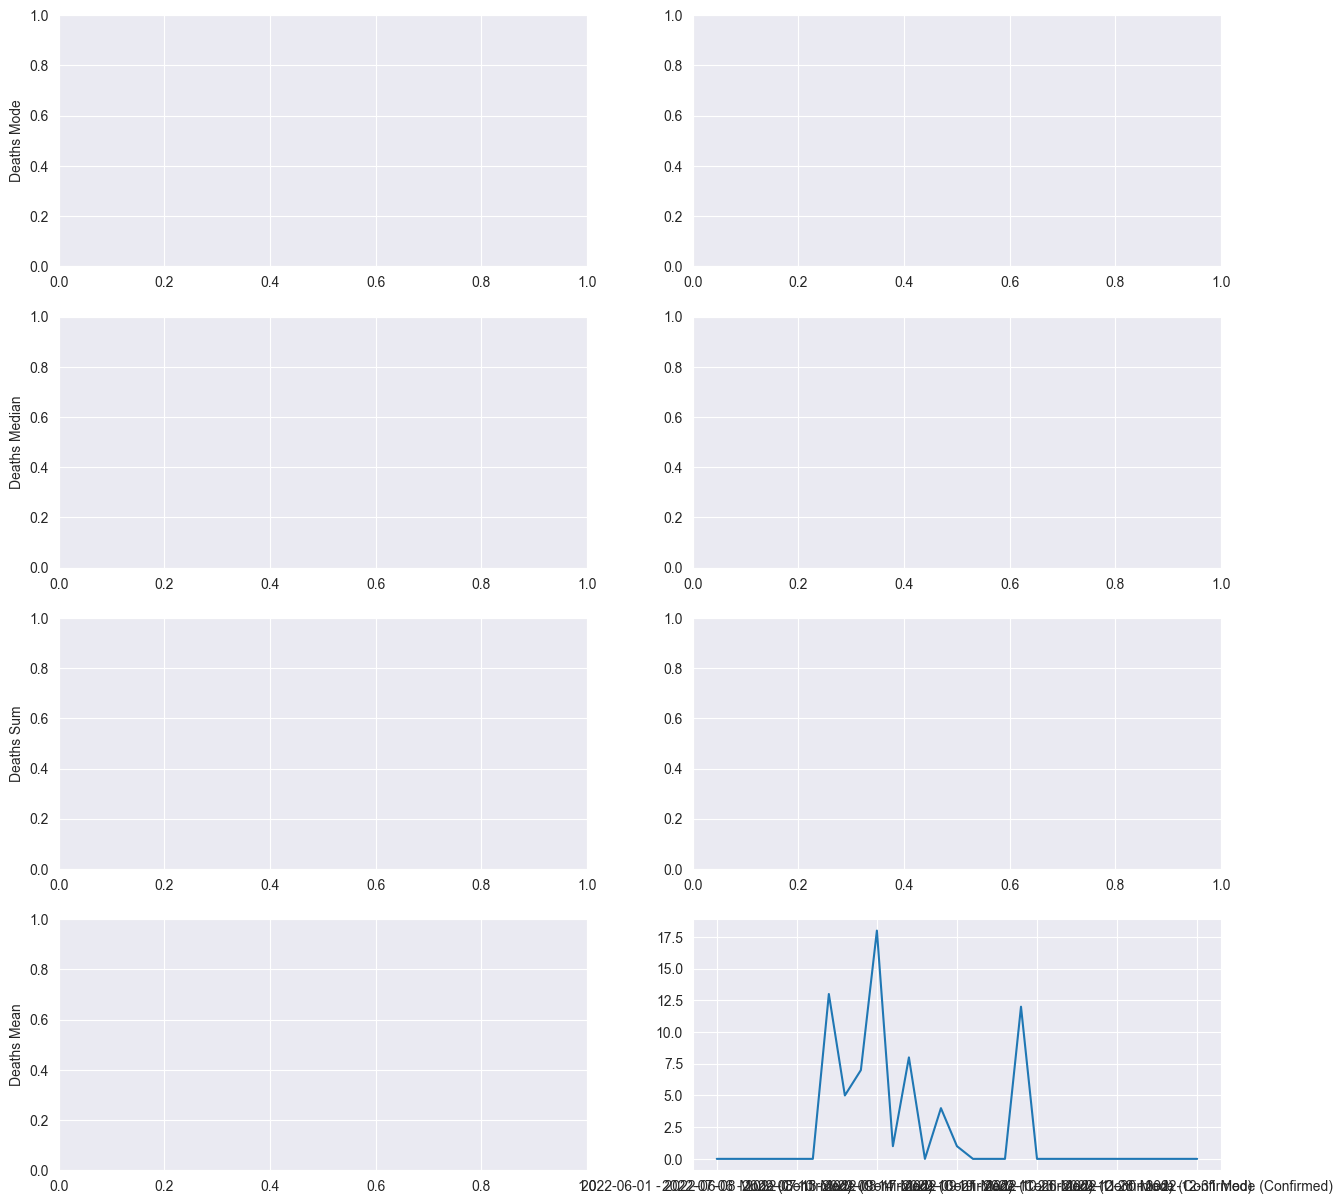

In [301]:
### Confirmed Modes, Sums, Means, and Medians to use ###

df_CO_deaths_mode = get_mode_data(df_CO_deaths_state.drop(['State', 'population'], axis=1)).astype(int).to_dict()
df_CO_deaths_mean = get_mean_data(df_CO_deaths_state.drop(['State', 'population'], axis=1))
df_CO_deaths_sum = get_sum_data(df_CO_deaths_state.drop(['State', 'population'], axis=1))
df_CO_deaths_median = get_median_data(df_CO_deaths_state.drop(['State', 'population'], axis=1))

### Confirmed Modes, Sums, Means, and Medians to use ###

df_CO_confirmed_mode = get_mode_data(df_CO_confirmed_state.drop(['State', 'population'], axis=1))
df_CO_confirmed_mean = get_mean_data(df_CO_confirmed_state.drop(['State', 'population'], axis=1))
df_CO_confirmed_sum = get_sum_data(df_CO_confirmed_state.drop(['State', 'population'], axis=1))
df_CO_confirmed_median = get_median_data(df_CO_confirmed_state.drop(['State', 'population'], axis=1))

fig, ax = plt.subplots(4, 2, figsize=(15, 15))
ax[0,0].set_ylabel('Deaths Mode')
ax[1,0].set_ylabel('Deaths Median')
ax[2,0].set_ylabel('Deaths Sum')
ax[3,0].set_ylabel('Deaths Mean')

#sns.lineplot(data=['Cases'], ax=ax[0,0])
#sns.lineplot(data=us_weekly_covid_mean['Deaths'], ax=ax[0,1])
#sns.lineplot(data=us_weekly_covid_median['Cases'], ax=ax[1,0])
#sns.lineplot(data=us_weekly_covid_median['Deaths'], ax=ax[1,1])
#sns.lineplot(data=us_weekly_covid_mode['Cases'], ax=ax[2,0])
#plot = sns.lineplot(data=us_weekly_covid_mode['Deaths'], ax=ax[2,1])

df_CO_confirmed_mode.iloc[0].plot(kind="line")

plt.show()


Below are the statistics per county each week.

In [302]:
display(df_CO_confirmed.drop(['countyFIPS', 'StateFIPS'], axis=1))
display(df_CO_deaths.drop(['countyFIPS', 'StateFIPS'], axis=1))

,County Name,State,2022-06-01 - 2022-06-08 Sum (Confirmed),2022-06-01 - 2022-06-08 Mean (Confirmed),2022-06-01 - 2022-06-08 Median (Confirmed),2022-06-01 - 2022-06-08 Mode (Confirmed),2022-06-08 - 2022-06-15 Sum (Confirmed),2022-06-08 - 2022-06-15 Mean (Confirmed),2022-06-08 - 2022-06-15 Median (Confirmed),2022-06-08 - 2022-06-15 Mode (Confirmed),...,2022-12-14 - 2022-12-21 Mode (Confirmed),2022-12-21 - 2022-12-28 Sum (Confirmed),2022-12-21 - 2022-12-28 Mean (Confirmed),2022-12-21 - 2022-12-28 Median (Confirmed),2022-12-21 - 2022-12-28 Mode (Confirmed),2022-12-28 - 2022-12-31 Sum (Confirmed),2022-12-28 - 2022-12-31 Mean (Confirmed),2022-12-28 - 2022-12-31 Median (Confirmed),2022-12-28 - 2022-12-31 Mode (Confirmed),population
244,Adams County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,908,303.0,0.0,0.0,517421
245,Alamosa County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,36,12.0,0.0,0.0,16233
246,Arapahoe County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,1398,466.0,0.0,0.0,656590
247,Archuleta County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,14029
248,Baca County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,4,1.0,0.0,0.0,3581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Summit County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,67,22.0,0.0,0.0,31011
304,Teller County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,33,11.0,0.0,0.0,25388
305,Washington County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,4908
306,Weld County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,324492


,County Name,State,2022-06-01 - 2022-06-08 Sum (Deaths),2022-06-01 - 2022-06-08 Mean (Deaths),2022-06-01 - 2022-06-08 Median (Deaths),2022-06-01 - 2022-06-08 Mode (Deaths),2022-06-08 - 2022-06-15 Sum (Deaths),2022-06-08 - 2022-06-15 Mean (Deaths),2022-06-08 - 2022-06-15 Median (Deaths),2022-06-08 - 2022-06-15 Mode (Deaths),...,2022-12-14 - 2022-12-21 Mode (Deaths),2022-12-21 - 2022-12-28 Sum (Deaths),2022-12-21 - 2022-12-28 Mean (Deaths),2022-12-21 - 2022-12-28 Median (Deaths),2022-12-21 - 2022-12-28 Mode (Deaths),2022-12-28 - 2022-12-31 Sum (Deaths),2022-12-28 - 2022-12-31 Mean (Deaths),2022-12-28 - 2022-12-31 Median (Deaths),2022-12-28 - 2022-12-31 Mode (Deaths),population
244,Adams County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,12,4.0,0.0,0.0,517421
245,Alamosa County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,2,1.0,0.0,0.0,16233
246,Arapahoe County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,8,3.0,0.0,0.0,656590
247,Archuleta County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,14029
248,Baca County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,3581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Summit County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,31011
304,Teller County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,2,1.0,0.0,0.0,25388
305,Washington County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,4908
306,Weld County,CO,0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0,0,0.0,0.0,0,0,0.0,0.0,0.0,324492


### Comparing Data

In the code below we compare our data against three other states. These states are NC, VA, and SC.
It is important to 'clean' our data, below I strip out all strings and any columns that are not of us for this analysis. The main focus is to determine how each state stacks against the other in terms of new deaths and confirmed cases. 

In [303]:

#Helper functions

FACTOR = 10000

covid_population.drop(covid_population[covid_population["County Name"].str.contains("Statewide")==True].index, inplace=True)
population_state = covid_population.drop(['countyFIPS', 'County Name'], axis=1).groupby("State").sum()

def get_new_deaths(df): 
    return df[df.columns.drop(list(df.filter(regex=r'(confirmed|deaths|(Confirmed))')))]

def get_new_confirmed(df):
    return df[df.columns.drop(list(df.filter(regex=r'(confirmed|deaths|(Deaths))')))]

def normalize(df, population):
    return (df/population) * FACTOR
#Get our three states

df_NC = covid_data.loc[covid_data["StateFIPS"] == 37]
df_SC = covid_data.loc[covid_data["StateFIPS"] == 45]
df_VA = covid_data.loc[covid_data["StateFIPS"] == 51]

df_NC = df_NC.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS', 'population'], axis=1).reset_index()
df_SC = df_SC.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS', 'population'], axis=1).reset_index()
df_VA = df_VA.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS', 'population'], axis=1).reset_index()
df_CO = df_CO.groupby('State').sum(numeric_only=True).drop(['countyFIPS', 'StateFIPS', 'population'], axis=1).reset_index()


#Get our new data and normalize it 
df_NC_deaths = normalize(get_new_deaths(df_NC.drop(['State'], axis=1)), population_state.loc['NC']['population'])
df_SC_deaths = normalize(get_new_deaths(df_SC.drop(['State'], axis=1)), population_state.loc['SC']['population'])
df_VA_deaths = normalize(get_new_deaths(df_VA.drop(['State'], axis=1)), population_state.loc['VA']['population'])
df_CO_deaths = normalize(get_new_deaths(df_CO.drop(['State'], axis=1)), population_state.loc['CO']['population'])

df_NC_confirmed = normalize(get_new_confirmed(df_NC.drop(['State'], axis=1)), population_state.loc['NC']['population'])
df_SC_confirmed = normalize(get_new_confirmed(df_SC.drop(['State'], axis=1)), population_state.loc['SC']['population'])
df_VA_confirmed = normalize(get_new_confirmed(df_VA.drop(['State'], axis=1)), population_state.loc['VA']['population'])
df_CO_confirmed = normalize(get_new_confirmed(df_CO.drop(['State'], axis=1)), population_state.loc['CO']['population'])

### Deaths Modes, Sums, Means, and Medians to use ###

df_NC_deaths_mode = get_mode_data(df_NC_deaths)
df_NC_deaths_mean = get_mean_data(df_NC_deaths)
df_NC_deaths_sum = get_sum_data(df_NC_deaths)
df_NC_deaths_median = get_mode_data(df_NC_deaths)

df_SC_deaths_mode = get_mode_data(df_SC_deaths)
df_SC_deaths_mean = get_mean_data(df_SC_deaths)
df_SC_deaths_sum = get_sum_data(df_SC_deaths)
df_SC_deaths_median = get_mode_data(df_SC_deaths)

df_VA_deaths_mode = get_mode_data(df_VA_deaths)
df_VA_deaths_mean = get_mean_data(df_VA_deaths)
df_VA_deaths_sum = get_sum_data(df_VA_deaths)
df_VA_deaths_median = get_mode_data(df_VA_deaths)

df_CO_deaths_mode = get_mode_data(df_CO_deaths)
df_CO_deaths_mean = get_mean_data(df_CO_deaths)
df_CO_deaths_sum = get_sum_data(df_CO_deaths)
df_CO_deaths_median = get_mode_data(df_CO_deaths)

### Confirmed Modes, Sums, Means, and Medians to use ###

df_NC_confirmed_mode = get_mode_data(df_NC_confirmed)
df_NC_confirmed_mean = get_mean_data(df_NC_confirmed)
df_NC_confirmed_sum = get_sum_data(df_NC_confirmed)
df_NC_confirmed_median = get_mode_data(df_NC_confirmed)

df_SC_confirmed_mode = get_mode_data(df_SC_confirmed)
df_SC_confirmed_mean = get_mean_data(df_SC_confirmed)
df_SC_confirmed_sum = get_sum_data(df_SC_confirmed)
df_SC_deaths_median = get_mode_data(df_SC_confirmed)

df_VA_confirmed_mode = get_mode_data(df_VA_confirmed)
df_VA_confirmed_mean = get_mean_data(df_VA_confirmed)
df_VA_confirmed_sum = get_sum_data(df_VA_confirmed)
df_VA_confirmed_median = get_mode_data(df_VA_confirmed)

df_CO_confirmed_mode = get_mode_data(df_CO_confirmed)
df_CO_confirmed_mean = get_mean_data(df_CO_confirmed)
df_CO_confirmed_sum = get_sum_data(df_CO_confirmed)
df_CO_confirmed_median = get_mode_data(df_CO_confirmed)

display(df_CO_confirmed_mode)



,2022-06-01 - 2022-06-08 Mode (Confirmed),2022-06-08 - 2022-06-15 Mode (Confirmed),2022-06-15 - 2022-06-22 Mode (Confirmed),2022-06-22 - 2022-06-29 Mode (Confirmed),2022-06-29 - 2022-07-06 Mode (Confirmed),2022-07-06 - 2022-07-13 Mode (Confirmed),2022-07-13 - 2022-07-20 Mode (Confirmed),2022-07-20 - 2022-07-27 Mode (Confirmed),2022-07-27 - 2022-08-03 Mode (Confirmed),2022-08-03 - 2022-08-10 Mode (Confirmed),...,2022-10-26 - 2022-11-02 Mode (Confirmed),2022-11-02 - 2022-11-09 Mode (Confirmed),2022-11-09 - 2022-11-16 Mode (Confirmed),2022-11-16 - 2022-11-23 Mode (Confirmed),2022-11-23 - 2022-11-30 Mode (Confirmed),2022-11-30 - 2022-12-07 Mode (Confirmed),2022-12-07 - 2022-12-14 Mode (Confirmed),2022-12-14 - 2022-12-21 Mode (Confirmed),2022-12-21 - 2022-12-28 Mode (Confirmed),2022-12-28 - 2022-12-31 Mode (Confirmed)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022574,0.008682,0.012155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
